<a href="https://colab.research.google.com/github/alchatman3/IDS/blob/main/HW5_Prb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import file from computer

from google.colab import files 
uploaded = files.upload()

Saving wine_flag_all.csv to wine_flag_all.csv


In [2]:
# Creating a dataframe with the file
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['wine_flag_all.csv'].decode('utf-8')))
df

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


In [3]:
# Does the dataset have any missing values?

df.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_df = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, df.shape[1]):
    if df.dtypes[i]=='object' or df.dtypes[i]=='bool':
        encoded_df[df.columns[i]] = le.fit_transform(df[df.columns[i]])



print("-=========================")
print(df)
print("-=========================")
encoded_df

-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


In [ ]:
# Cross tabulation of Type and Alcohol content

crosstab1 = pd.crosstab(df.Type, df.Alcohol_flag)

print(crosstab1)

In [6]:
# Cross tabulation of Type and Sugar content

crosstab2 = pd.crosstab(df.Type, df.Sugar_flag)

print(crosstab2)

Sugar_flag  High  Low
Type                 
Red          237  848
White       1382  878


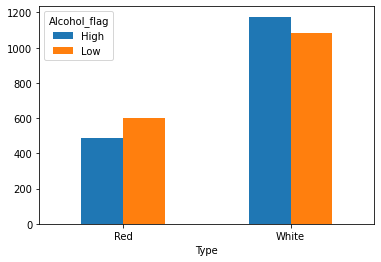

In [7]:
# Creating barplot of Type and Alcohol content cross tabulation

# x label rotation
barplot = crosstab1.plot.bar(rot=0)

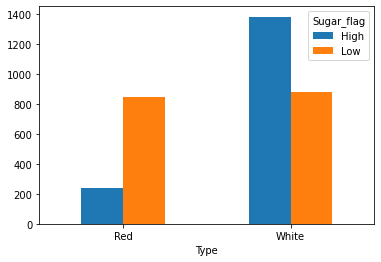

In [8]:
# Creating barplot of Type and Sugar content cross tabulation

# x label rotation
barplot = crosstab2.plot.bar(rot=0)

In [9]:
# Create a frequency table of the data

pd.crosstab(index=df['Type'], columns='count')

col_0,count
Type,
Red,1085
White,2260


In [10]:
# Create a frequency table of the data

pd.crosstab(index=df['Alcohol_flag'], columns='count')

col_0,count
Alcohol_flag,
High,1661
Low,1684


In [11]:
# Create a frequency table of the data

pd.crosstab(index=df['Sugar_flag'], columns='count')

col_0,count
Sugar_flag,
High,1619
Low,1726


      Type  Alcohol_flag  Sugar_flag
1783     1             1           0
110      0             1           0
2936     1             0           0
2326     1             1           1
612      1             1           0
...    ...           ...         ...
3074     1             0           1
2259     1             1           0
1524     0             0           1
1629     1             1           1
512      1             1           0

[2676 rows x 3 columns]
      Type  Alcohol_flag  Sugar_flag
1779     1             1           0
3176     1             0           1
2544     1             0           0
1470     0             0           1
810      1             0           0
...    ...           ...         ...
1979     1             1           0
2923     1             0           0
1518     0             0           0
998      1             1           1
1342     0             0           0

[669 rows x 3 columns]
[1.0, 1.0]


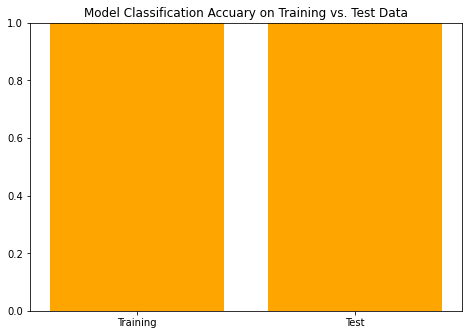

In [12]:
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_df.iloc[:,0:3]
y = encoded_df.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.20, stratify=y)

# Display the sets
print(X_train)
print(X_test)


# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(scores)

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

      Type  Alcohol_flag  Sugar_flag
3303     1             0           0
1633     1             1           0
813      1             0           0
2700     1             0           0
2594     1             0           0
...    ...           ...         ...
626      1             1           1
2259     1             1           0
3002     1             0           1
1033     0             1           1
512      1             1           0

[2508 rows x 3 columns]
      Type  Alcohol_flag  Sugar_flag
1065     0             1           1
1160     0             1           1
816      1             1           0
1468     0             0           1
876      1             0           1
...    ...           ...         ...
1899     1             1           0
1886     1             1           0
2003     1             1           0
499      0             0           1
640      1             0           0

[837 rows x 3 columns]
[1.0, 1.0]


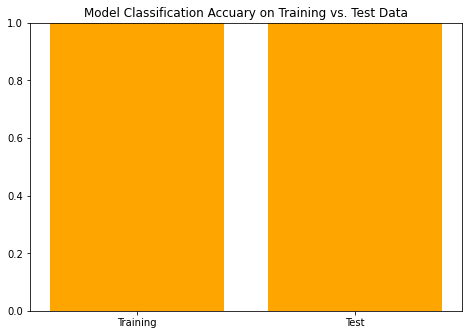

In [13]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.25, stratify=y)

# Display the sets
print(X_train)
print(X_test)


# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(scores)

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

      Type  Alcohol_flag  Sugar_flag
833      1             1           1
1582     0             0           1
469      0             1           1
2489     1             0           0
2099     1             1           1
...    ...           ...         ...
2947     1             0           1
2808     1             0           1
2259     1             1           0
227      0             1           1
512      1             1           0

[2341 rows x 3 columns]
      Type  Alcohol_flag  Sugar_flag
549      1             1           0
3199     1             0           1
1028     0             1           1
2959     1             0           0
2653     1             0           1
...    ...           ...         ...
3029     1             0           1
486      0             1           1
2342     1             1           0
2800     1             0           0
446      0             1           1

[1004 rows x 3 columns]
[1.0, 1.0]


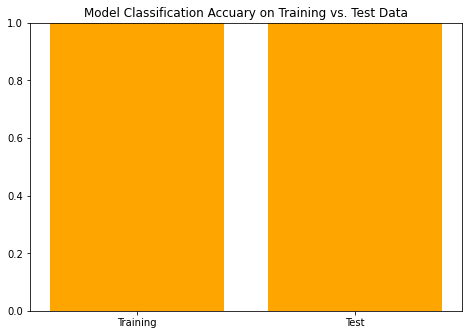

In [14]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.30, stratify=y)

# Display the sets
print(X_train)
print(X_test)


# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(scores)

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

      Type  Alcohol_flag  Sugar_flag
1927     1             1           1
547      1             0           0
1742     1             1           0
360      0             1           1
424      0             1           0
...    ...           ...         ...
2454     1             0           0
2259     1             1           0
2855     1             0           0
325      0             1           1
512      1             1           0

[2007 rows x 3 columns]
      Type  Alcohol_flag  Sugar_flag
3340     1             0           0
89       0             1           1
904      1             0           1
2360     1             1           0
301      0             1           1
...    ...           ...         ...
2839     1             0           0
1333     0             0           1
594      1             1           1
2814     1             0           0
2321     1             1           0

[1338 rows x 3 columns]
[1.0, 1.0]


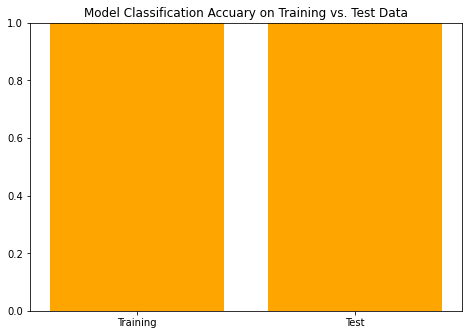

In [15]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.40, stratify=y)

# Display the sets
print(X_train)
print(X_test)


# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(scores)

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

      Type  Alcohol_flag  Sugar_flag
25       0             1           1
2489     1             0           0
583      1             0           0
1396     0             0           1
2032     1             1           0
...    ...           ...         ...
2499     1             0           1
238      0             0           1
2855     1             0           0
2795     1             0           1
908      1             0           1

[1672 rows x 3 columns]
      Type  Alcohol_flag  Sugar_flag
1881     1             1           0
1957     1             1           0
1589     1             1           0
3038     1             0           1
386      0             0           1
...    ...           ...         ...
2985     1             0           1
2615     1             0           0
42       0             1           0
2580     1             0           1
2914     1             0           1

[1673 rows x 3 columns]
[1.0, 1.0]


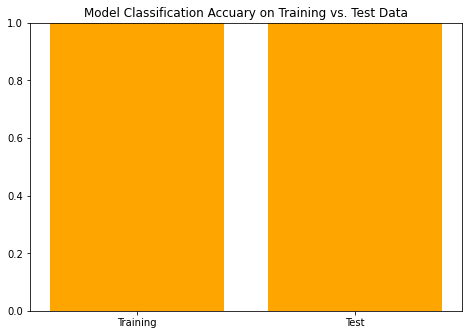

In [16]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.50, stratify=y)

# Display the sets
print(X_train)
print(X_test)


# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(scores)

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()